This is a work in progress, an attempt to aid in understanding morphological openings and fourier transforms of imagery.

In [37]:
from scipy import ndimage, signal, spatial
from scipy.ndimage import morphology

import numpy as np
import pandas as pd
import pdal

import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
from osgeo import gdal

In [3]:
raster = gdal.Open(r"E:\IG\ctc_msimbazi.tif")

In [4]:
raster.GetProjection()

'PROJCS["WGS 84 / UTM zone 37S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32737"]]'

In [5]:
band1 = raster.GetRasterBand(1) # Red channel
band2 = raster.GetRasterBand(2) # Green channel
band3 = raster.GetRasterBand(3) # Blue channel

In [6]:

b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

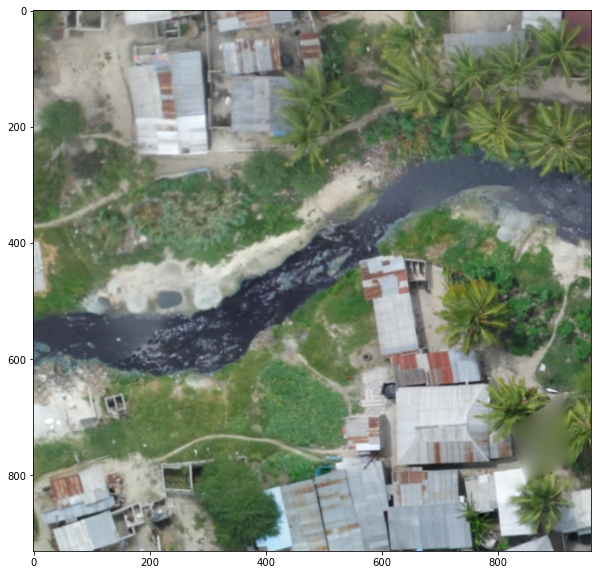

In [7]:
img = np.dstack((b1, b2, b3))
f = plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [8]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [9]:
data_in = r"E:\IG\cropped_thinned_cropped.las"

#readin in full res .las , subsampled with Poisson, change radius to reach desired resolution
p = pdal.Reader.las(data_in).pipeline()
n_points = p.execute()
f'Pipeline selected {n_points} points'

'Pipeline selected 5173 points'

In [10]:
#create a one dimensional array from the "Classification" column
cls = p.arrays[0]['Classification']
#set the array to all ones
cls.fill(1)

In [11]:
#convert X,Y, and Z data to a pandas dataframe
df3D = pd.DataFrame(p.arrays[0], columns=['X','Y','Z'])

In [12]:
#define variables (if we keep k = 0, then I'll clean up the code, remove gstar?)
S = 20
k = 0.000
n = 0.1
b = -0.2

In [13]:
#can't find any documentation on .ptp(), but it must be the x and y length for computing the area
density = n_points / (p.arrays[0]['Y'].ptp() * p.arrays[0]['X'].ptp())
#hres = 1. / density
#override calculated hres and setting it to 0.25 m

#this setting should be relative to point density, but the above method "1./density" is not the way to go.

hres = 1

In [14]:
print("Point cloud density estimated as", density, "pts/m^2. Processing at", hres, "m resolution.")

Point cloud density estimated as 1.2515711951918727 pts/m^2. Processing at 1 m resolution.


In [15]:
import seaborn as sns

In [16]:
dfvis = pd.DataFrame(p.arrays[0])

C:\Users\Grendel\.conda\envs\py39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density', ylabel='Z'>

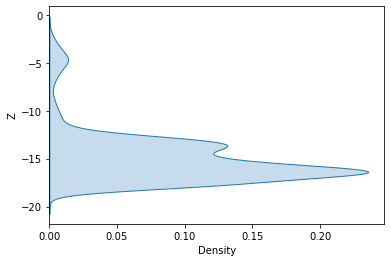

In [17]:
sns.kdeplot(dfvis.Z,shade=True,vertical=True)


C:\Users\Grendel\.conda\envs\py39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density', ylabel='Classification'>

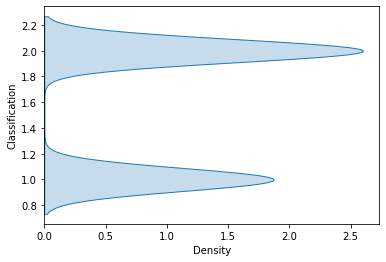

In [18]:
sns.kdeplot(dfvis.Classification,shade=True,vertical=True)

(527686.25551155, 527756.97452145, 9246782.185477952, 9246852.90447905)

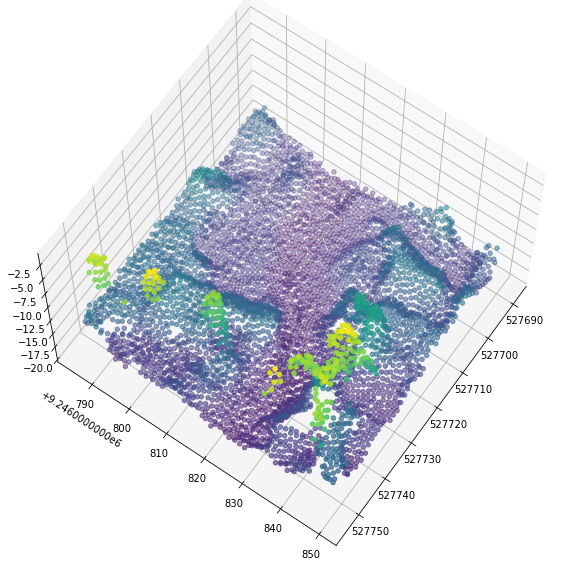

In [21]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfvis.X, dfvis.Y, dfvis.Z, c=dfvis.Z, cmap='viridis')
ax.view_init(65, 35)

ax.axis('tight')

In [25]:
#np.ogrid "open-grid", creates a way to index the matrix (access pixels/pts) hres is the step
xi = np.ogrid[p.arrays[0]['X'].min():p.arrays[0]['X'].max():hres]
yi = np.ogrid[p.arrays[0]['Y'].min():p.arrays[0]['Y'].max():hres]

In [26]:
#np.digitize allocates points to bins and then bins are grouped in the df
bins = df3D.groupby([np.digitize(p.arrays[0]['X'], xi), np.digitize(p.arrays[0]['Y'], yi)])

In [27]:
#figure out a way to plot pointcloud based on group coloring

gb = bins.groups
gb

{(1, 1): [5142], (1, 3): [5143, 5144, 5145], (1, 4): [5146], (1, 5): [5147, 5148], (1, 7): [5149], (1, 8): [5150], (1, 9): [5151], (1, 11): [5152], (1, 12): [5153], (1, 15): [5154], (1, 17): [5155], (1, 21): [5156], (1, 22): [5157], (1, 24): [5158], (1, 25): [5159], (1, 27): [5160], (1, 28): [5161], (1, 30): [5162], (1, 32): [5163], (1, 33): [5164], (1, 35): [5165], (1, 36): [5166], (1, 37): [5167], (1, 39): [5168], (1, 40): [5169], (1, 41): [5170], (1, 44): [5171], (1, 46): [5172], (1, 49): [1065], (1, 50): [1064], (1, 51): [1071], (1, 52): [1062, 1073], (1, 53): [1059, 1072], (1, 54): [1056, 1074], (1, 55): [1057], (1, 56): [1067], (1, 57): [1066], (1, 58): [1069], (1, 59): [1061, 1063], (1, 60): [1070], (1, 61): [1060], (1, 62): [1068], (1, 63): [1058], (2, 1): [266], (2, 2): [311, 350], (2, 3): [382], (2, 4): [416, 432], (2, 5): [474, 513], (2, 6): [531, 573], (2, 7): [601, 657], (2, 8): [702], (2, 9): [769], (2, 10): [829], (2, 11): [865, 899], (2, 12): [933], (2, 13): [1312, 1372

In [31]:
zmins = bins.Z.min() #collects the lowest point in each bin
cz = np.empty((yi.size, xi.size)) #create empty 2d array 
cz.fill(np.nan) #fill 2d array with nan
for name, val in zmins.items():
    #print(name[1],name[0],val)
    cz[name[1]-1, name[0]-1] = val #adding coordinates to lowest points only(not sure why -1 is used here)

In [29]:
cz

array([[-14.735001, -14.175   , -14.435   , ..., -13.405001, -14.365001,
               nan],
       [       nan, -14.165001,        nan, ..., -13.645   , -13.045   ,
        -11.805   ],
       [-15.695001, -13.345   , -13.655001, ..., -13.335001, -13.355   ,
        -12.775001],
       ...,
       [-12.955001, -14.085001, -14.815   , ..., -13.895   , -13.695001,
               nan],
       [       nan, -14.275001,        nan, ..., -14.055   , -13.925   ,
        -13.045   ],
       [       nan,        nan,        nan, ...,        nan, -13.845   ,
               nan]])

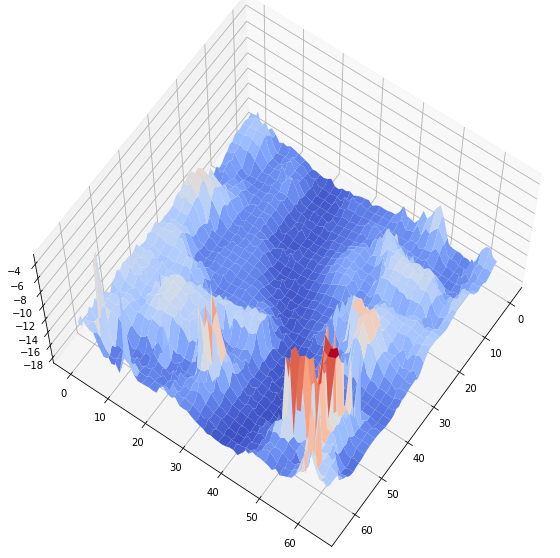

In [113]:
nx,ny =cz.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(65, 35)
ha.plot_surface(X,Y,cz,cmap=cm.coolwarm)


In [39]:
x,y =cz.shape
x,y,hres

major = np.arange(0,x,hres*10)
minor = np.arange(0,x,hres)

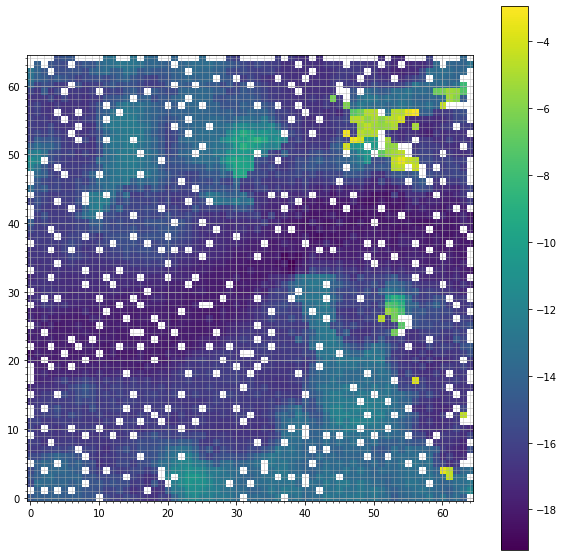

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

#ax.set_xticks(major)
ax.set_xticks(minor,minor=True)
#ax.set_yticks(major)
ax.set_yticks(minor,minor=True)

#ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
#ax.grid(which='major', alpha=1)

plt.imshow(cz, origin='lower'); plt.colorbar(); ax.grid()

In [44]:
def idw(data):
    # Find indices of the ground returns, i.e., anything that is not a nan, and create a KD-tree.
    # We will search this tree when looking for nearest neighbors to perform the interpolation.
    valid = np.argwhere(~np.isnan(data))
    tree = spatial.cKDTree(valid)
    
    # Now find indices of the non-ground returns, as indicated by nan values. We will interpolate
    # at these locations.
    nans = np.argwhere(np.isnan(data))    
    for row in nans:
        d, idx = tree.query(row, k=12)
        d = np.power(d, -2)
        v = data[valid[idx, 0], valid[idx, 1]]
        data[row[0], row[1]] = np.inner(v, d)/np.sum(d)
        
    return data

In [45]:
%%time
cz = idw(cz)

Wall time: 20.5 ms


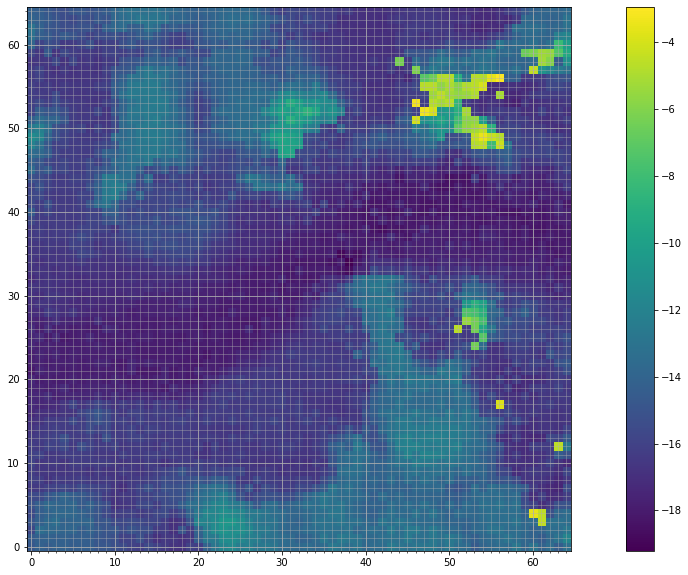

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

#ax.set_xticks(major)
ax.set_xticks(minor,minor=True)
#ax.set_yticks(major)
ax.set_yticks(minor,minor=True)

#ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
#ax.grid(which='major', alpha=1)

plt.imshow(cz, origin='lower'); plt.colorbar(); ax.grid()

https://www.youtube.com/watch?v=E_vU1Wd7Ks8&ab_channel=JianWeiTay

In [104]:
#create an initial diamond(plus shaped) 2,1 and enlarge it 11 times = 23x,23y
#does this structoring element size have any corelation to point density,cloud features or binsize?

struct = ndimage.iterate_structure(ndimage.generate_binary_structure(2, 1), 11).astype(int)
opened = morphology.grey_opening(cz, structure=struct) #opening = Erosion -> Dilation

#morphological opening is useful to smooth objects and remove noise

In [103]:
struct

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0,

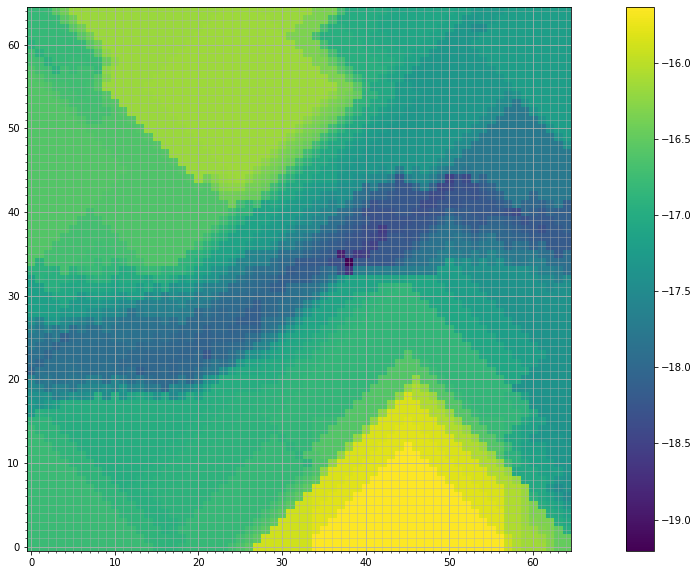

In [48]:
fig, ax = plt.subplots(figsize=(20,10))

#ax.set_xticks(major)
ax.set_xticks(minor,minor=True)
#ax.set_yticks(major)
ax.set_yticks(minor,minor=True)

#ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
#ax.grid(which='major', alpha=1)

plt.imshow(opened, origin='lower'); plt.colorbar(); ax.grid()

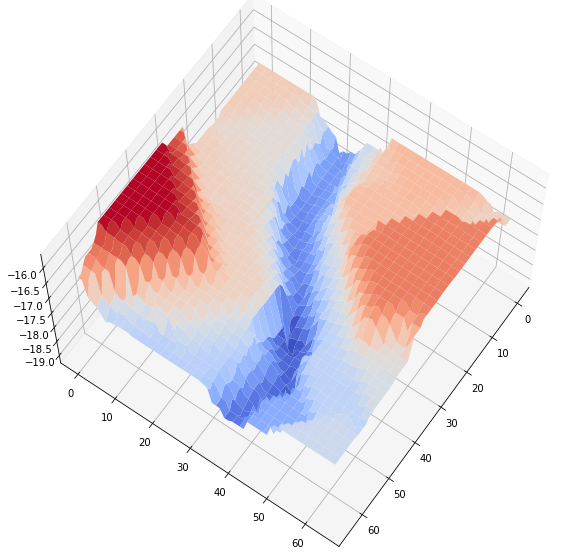

In [64]:
nx,ny =cz.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(65, 35)
ha.plot_surface(X,Y,opened,cmap=cm.coolwarm)

In [49]:
#create another plus-shaped (2,1) and enlarge it 9 times = 19x,19y
struct = ndimage.iterate_structure(ndimage.generate_binary_structure(2, 1), 9).astype(int)
closed = morphology.grey_closing(opened, structure=struct) #closing = dilation -> erosion

#closing is useful for filling in small holes while preserving shape and size of objects

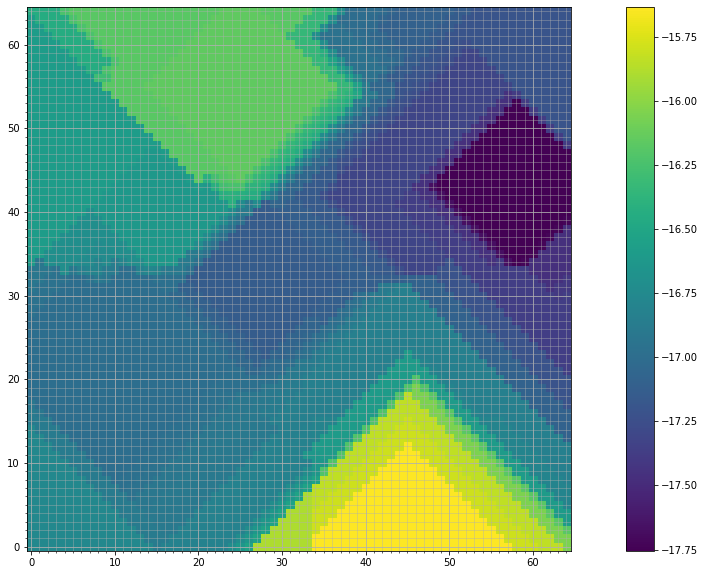

In [52]:

fig, ax = plt.subplots(figsize=(20,10))

#ax.set_xticks(major)
ax.set_xticks(minor,minor=True)
#ax.set_yticks(major)
ax.set_yticks(minor,minor=True)

#ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
#ax.grid(which='major', alpha=1)

plt.imshow(closed, origin='lower'); plt.colorbar(); ax.grid()

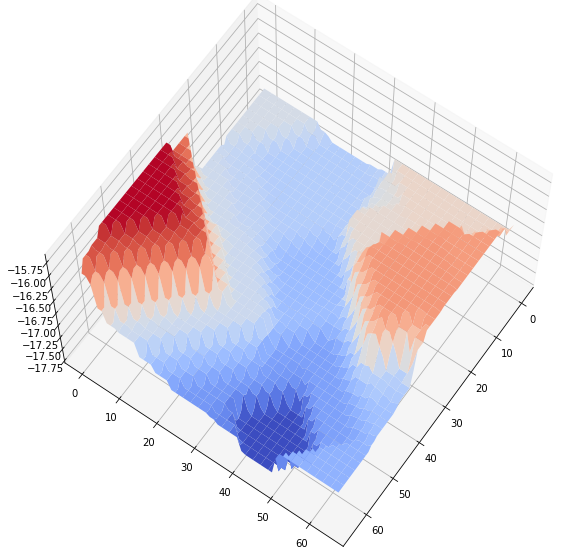

In [65]:
nx,ny =cz.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(65, 35)
ha.plot_surface(X,Y,closed,cmap=cm.coolwarm)

In [53]:
#removing low outliers: if any pt in cz is >= 1 meter below the surface of closed then it is set to the 
#closed surface value
#need to test lower limit >= 0.5
lowx, lowy = np.where((closed - cz) >= 1.0) 
cz[lowx, lowy] = closed[lowx, lowy]

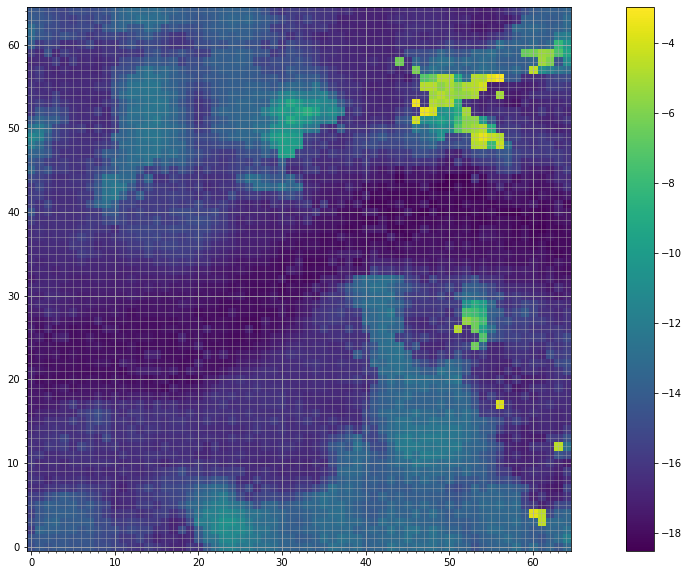

In [55]:
#there are no low outliers in this data

fig, ax = plt.subplots(figsize=(20,10))

#ax.set_xticks(major)
ax.set_xticks(minor,minor=True)
#ax.set_yticks(major)
ax.set_yticks(minor,minor=True)

#ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
#ax.grid(which='major', alpha=1)

plt.imshow(cz, origin='lower'); plt.colorbar(); ax.grid()

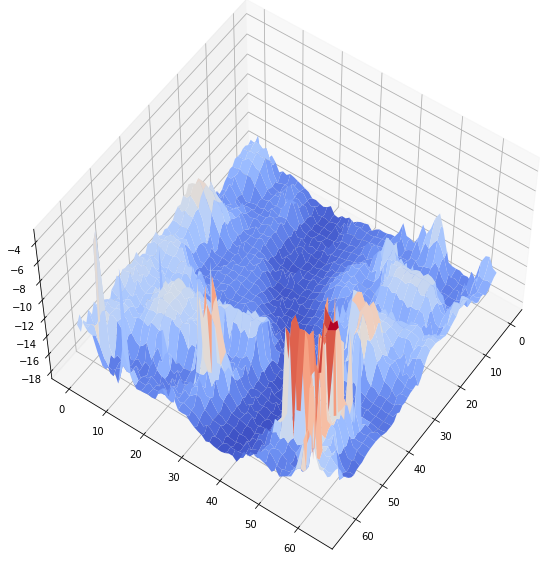

In [108]:
nx,ny =cz.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(55, 35)
ha.plot_surface(X,Y,cz,cmap=cm.coolwarm)

In [56]:
stdev = 14
#product of two guassian arrays with the max normalized to 1, size/window = 113
G = np.outer(signal.gaussian(113,stdev), signal.gaussian(113,stdev))
#fast fourier transform convolution, matrix is padded at 2*stdev
low = signal.fftconvolve(np.pad(cz,2*stdev,'edge'), G, mode='same')[2*stdev:-2*stdev,2*stdev:-2*stdev]/1000.

In [105]:
G.shape

(113, 113)

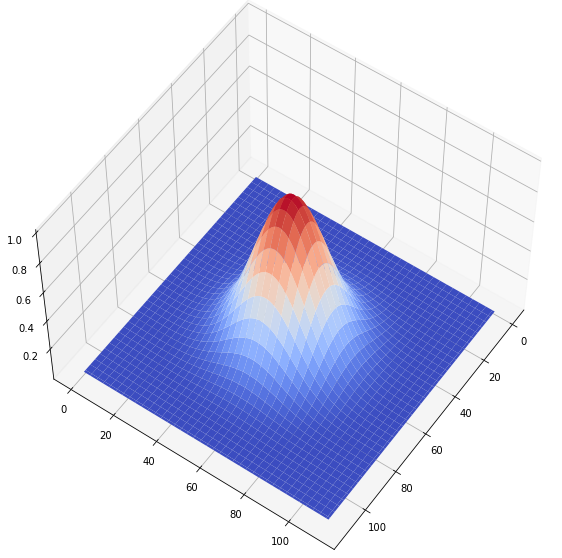

In [107]:
nx,ny =G.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(55, 35)
ha.plot_surface(X,Y,G,cmap=cm.coolwarm)

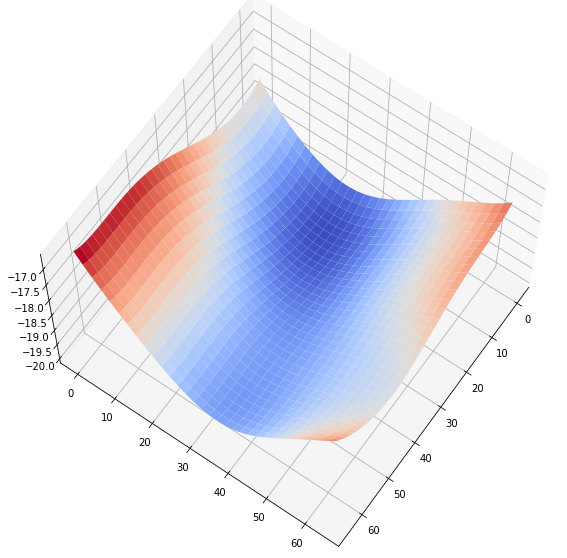

In [111]:
nx,ny =cz.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(65, 35)
ha.plot_surface(X,Y,low,cmap=cm.coolwarm)

In [68]:
%%time
high = cz - low

Wall time: 0 ns


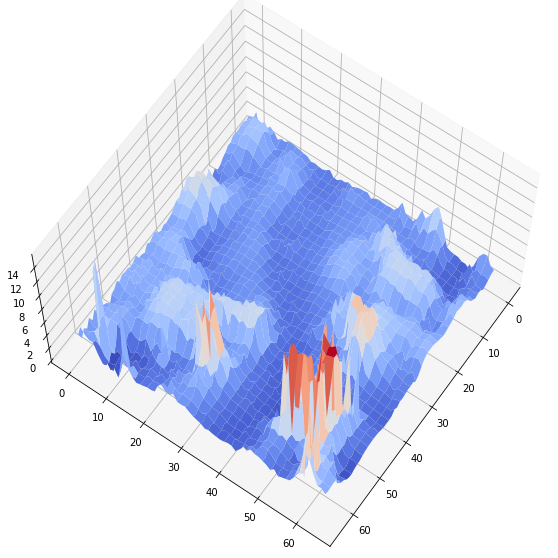

In [69]:
nx,ny =cz.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(65, 35)
ha.plot_surface(X,Y,high,cmap=cm.coolwarm)

flattening structure defined by size=3:

 https://www.mathworks.com/help/images/structuring-elements.html#:~:text=A%20flat%20structuring%20element%20is,in%20the%20image%20being%20processed.

greyscale erosion: https://en.wikipedia.org/wiki/Erosion_%28morphology%29, https://www.youtube.com/watch?v=yM0tqRhpxoM&ab_channel=JianWeiTay

In [102]:
from IPython.display import YouTubeVideo
YouTubeVideo('yM0tqRhpxoM&ab_channel=JianWeiTay')

In [138]:
%%time
erosions = []
granulometry = []
erosions.append(morphology.grey_erosion(high, size=3))

#trying to come up with a way to visualize the grey erosion on high
nper = np.asarray(erosions)
nper.shape


Wall time: 500 µs


(1, 65, 65)

In [139]:
nper

array([[[3.42843937, 3.42843937, 3.8226497 , ..., 2.27975151,
         2.27975151, 2.27975151],
        [2.71095955, 2.71095955, 3.8226497 , ..., 2.27975151,
         2.27975151, 2.27975151],
        [2.71095955, 2.71095955, 4.16036499, ..., 2.33717888,
         3.16097246, 3.54018685],
        ...,
        [3.10470759, 2.69825027, 2.50298356, ..., 3.52516301,
         3.52516301, 3.5566074 ],
        [2.92442379, 2.58859864, 2.28489453, ..., 3.52516301,
         3.52516301, 3.54750512],
        [2.92442379, 2.58859864, 2.28489453, ..., 3.52516301,
         3.52516301, 3.54750512]]])

In [143]:
new = nper.reshape(65,65)

In [144]:
new.shape

(65, 65)

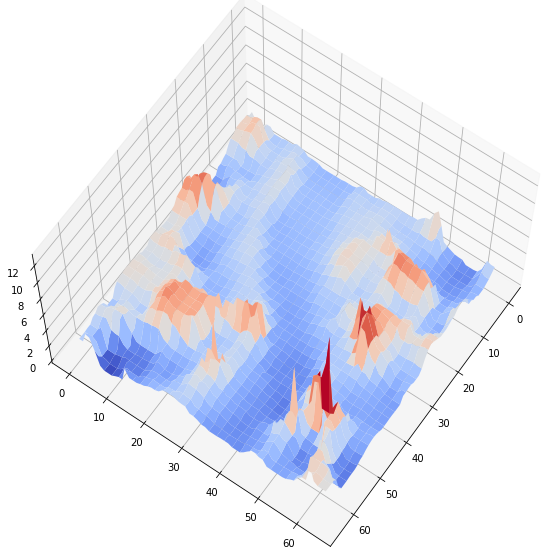

In [145]:
nx,ny =new.shape
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(20,10))
ha = hf.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)
ha.view_init(65, 35)
ha.plot_surface(X,Y,new,cmap=cm.coolwarm)

In [146]:
for scale in range(1, S):
    erosions.append(morphology.grey_erosion(erosions[scale-1], size=3))
for scale in range(1, S+1):
    granulometry.append(morphology.grey_dilation(erosions[scale-1], size=2*scale+1))

In [149]:
nper2 = np.asarray(erosions)
nper2

array([[[ 3.42843937,  3.42843937,  3.8226497 , ...,  2.27975151,
          2.27975151,  2.27975151],
        [ 2.71095955,  2.71095955,  3.8226497 , ...,  2.27975151,
          2.27975151,  2.27975151],
        [ 2.71095955,  2.71095955,  4.16036499, ...,  2.33717888,
          3.16097246,  3.54018685],
        ...,
        [ 3.10470759,  2.69825027,  2.50298356, ...,  3.52516301,
          3.52516301,  3.5566074 ],
        [ 2.92442379,  2.58859864,  2.28489453, ...,  3.52516301,
          3.52516301,  3.54750512],
        [ 2.92442379,  2.58859864,  2.28489453, ...,  3.52516301,
          3.52516301,  3.54750512]],

       [[ 2.71095955,  2.71095955,  2.71095955, ...,  2.27975151,
          2.27975151,  2.27975151],
        [ 2.71095955,  2.71095955,  2.71095955, ...,  2.27975151,
          2.27975151,  2.27975151],
        [ 2.71095955,  2.71095955,  2.71095955, ...,  2.00593482,
          2.00593482,  2.00593482],
        ...,
        [ 1.75598032,  1.75598032,  1.26947733, ...,  

In [159]:
nper2[0].shape

(65, 65)

In [166]:
nper2[:1

array([[[3.42843937, 3.42843937, 3.8226497 , ..., 2.27975151,
         2.27975151, 2.27975151],
        [2.71095955, 2.71095955, 3.8226497 , ..., 2.27975151,
         2.27975151, 2.27975151],
        [2.71095955, 2.71095955, 4.16036499, ..., 2.33717888,
         3.16097246, 3.54018685],
        ...,
        [3.10470759, 2.69825027, 2.50298356, ..., 3.52516301,
         3.52516301, 3.5566074 ],
        [2.92442379, 2.58859864, 2.28489453, ..., 3.52516301,
         3.52516301, 3.54750512],
        [2.92442379, 2.58859864, 2.28489453, ..., 3.52516301,
         3.52516301, 3.54750512]]])

In [ ]:
]

In [165]:
for ij in np.ndindex(nper2[:2]):
    print(ij,nper2[ij])

TypeError: only integer scalar arrays can be converted to a scalar index

In [79]:
%%time
out = []
for i in range(1, len(granulometry)):
    out.append(granulometry[i-1]-granulometry[i])

Wall time: 500 µs


In [80]:
%%time
gprime = np.maximum.reduce(out)
xs, ys = out[0].shape
gstar = np.zeros((xs,ys))
gplus = np.zeros((xs,ys))
for ii in range(0,xs):
    for jj in range(0,ys):
        for kk in range(0,len(out)):
            if out[kk][ii,jj] < gprime[ii,jj]:
                gplus[ii,jj] += out[kk][ii,jj]
            if out[kk][ii,jj] == gprime[ii,jj]:
                gplus[ii,jj] += out[kk][ii,jj]
                gstar[ii,jj] = kk
                break

Wall time: 27.5 ms


Text(0.5, 1.0, '$g^+$')

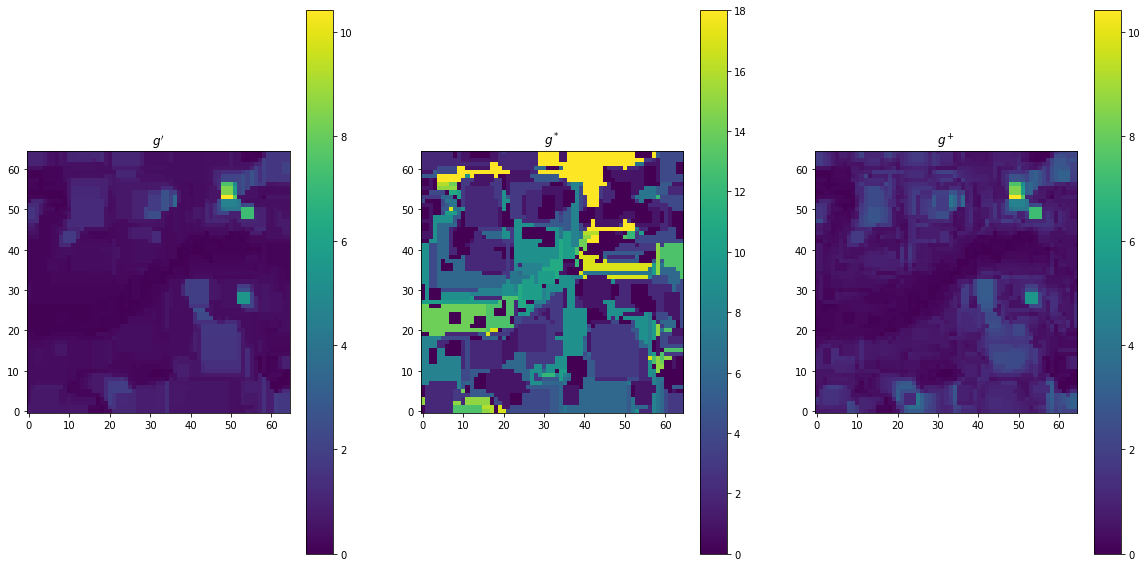

In [83]:
plt.figure(figsize=(20, 10));
plt.subplot(1,3,1); plt.imshow(gprime, origin='lower'); plt.colorbar(); plt.title('$g^{\prime}$')
plt.subplot(1,3,2); plt.imshow(gstar, origin='lower'); plt.colorbar(); plt.title('$g^*$')
plt.subplot(1,3,3); plt.imshow(gplus, origin='lower'); plt.colorbar(); plt.title('$g^+$')